# pip install galaxychop

In [1]:
import galaxychop as gchop
import matplotlib.pylab as plt

# Galaxy 

In [2]:
gal = gchop.read_hdf5("../galaxy-chop/tests/datasets/gal394242.h5") #Rama dev

In [3]:
print(gal.stars)
print(gal.gas)
print(gal.dark_matter)

ParticleSet(STARS, size=37393, softening=0.0, potentials=True)
ParticleSet(GAS, size=80153, softening=0.0, potentials=True)
ParticleSet(DARK_MATTER, size=155101, softening=0.0, potentials=True)


In [4]:
gal.stars.to_dataframe()

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,5.224283e+05,0.045630,0.023792,-0.036427,10.773575,-6.878906,-20.425400,0.0,-195699.620206,290.293111,-195409.327095,-0.736533,0.539572,-0.570209
1,stars,0,9.745897e+05,-0.094469,0.054867,0.006084,20.282349,8.661957,-7.947495,0.0,-196176.962277,274.782915,-195902.179362,-0.488759,-0.627390,-1.931126
2,stars,0,6.935776e+05,-0.172213,-0.000511,0.047600,-14.897980,6.957092,-10.818886,0.0,-195152.120168,193.699612,-194958.420557,-0.325631,-2.572295,-1.205710
3,stars,0,1.070959e+06,-0.081766,-0.116694,0.177133,-8.665253,-4.337433,5.506927,0.0,-194695.767625,62.113089,-194633.654536,0.125676,-1.084623,-0.656530
4,stars,0,6.013803e+05,0.020734,0.023444,0.101449,23.508469,-7.842865,-3.754723,0.0,-195703.942688,314.128285,-195389.814402,0.707622,2.462754,-0.713749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37388,stars,0,9.867470e+05,106.774056,87.263419,159.014140,-100.653503,63.202698,-85.475418,0.0,-26553.893402,10715.877926,-15838.015476,-17508.999905,-6878.773210,15531.777291
37389,stars,0,8.290853e+05,17.139401,-0.173818,-14.042400,-123.761139,207.387939,-331.186005,0.0,-101280.155757,84005.373302,-17274.782455,2969.790474,7414.233143,3532.993141
37390,stars,0,1.004103e+06,22.673465,-5.653880,-54.095701,-7.648605,-75.346008,-298.172089,0.0,-64131.846872,47321.058282,-16810.788589,-2390.066032,7174.351182,-1751.599401
37391,stars,0,1.526682e+06,219.026432,162.543699,74.150249,-72.785324,-52.725632,55.277878,0.0,-19698.409864,5566.669709,-14131.740154,12894.689414,-17504.366200,282.488820


(-50.0, 50.0)

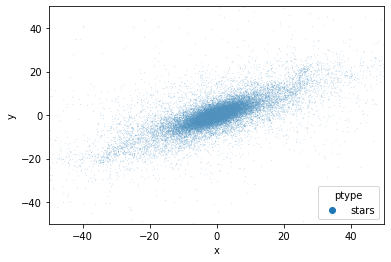

In [5]:
ax = gal.plot.scatter("x","y", alpha=.5, s=0.5, ptypes=['stars'], labels='ptype')
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)

In [6]:
#ax = gal.plot.scatter("x","y", alpha=.5, s=0.5, labels='ptype')
#ax.set_xlim(-250,250)
#ax.set_ylim(-250,250)

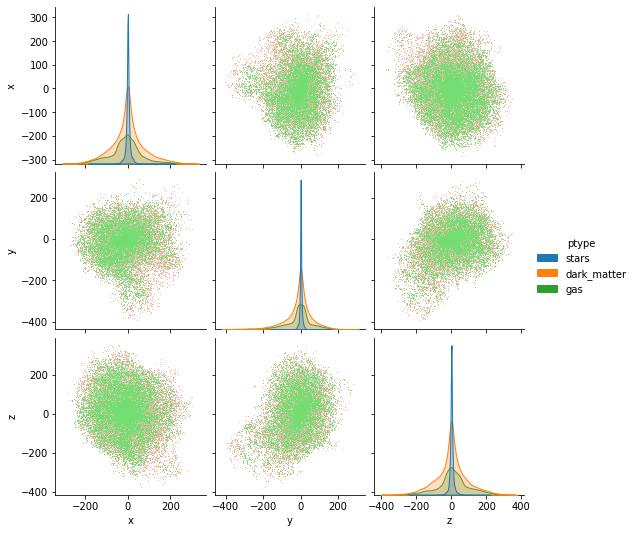

In [7]:
gal.plot.pairplot()

#  Persistencia Galaxia

In [8]:
gal.to_hdf5("output.h5")

# Preprocesado (Centrado, Alineado, $\epsilon$, $\epsilon_p$)

In [9]:
galc = gchop.center(gal)

rvir = 297.470
gal = gchop.star_align(galc, r_cut= 0.1*rvir)

In [10]:
gal.to_dataframe()

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,5.224283e+05,-0.053393,-0.063512,-0.261071,6.017590,22.533272,-6.051982,0.0,-195699.620206,290.293111,-195409.327095,6.267166,-1.894153,-0.820925
1,stars,0,9.745897e+05,-0.160266,-0.127742,-0.178286,21.924235,8.289647,-0.418943,0.0,-196176.962277,274.782915,-195902.179362,1.531441,-3.975916,1.472102
2,stars,0,6.935776e+05,-0.255175,-0.165614,-0.198094,-9.574002,7.298885,15.571255,0.0,-195152.120168,193.699612,-194958.420557,-1.132945,5.869943,-3.448075
3,stars,0,1.070959e+06,-0.233303,-0.256464,-0.370506,-9.678900,-5.458488,-0.866013,0.0,-194695.767625,62.113089,-194633.654536,-1.800299,3.384044,-1.208809
4,stars,0,6.013803e+05,-0.075262,-0.200221,-0.282568,16.644463,8.046805,-16.925347,0.0,-195703.942688,314.128285,-195389.814402,5.662575,-5.977037,2.726944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272642,gas,2,1.429845e+06,-85.899749,291.965507,-178.219934,-113.321459,-40.698785,-124.733209,0.0,-17314.963254,15028.258726,-2286.704528,-43671.129141,9481.591579,36581.972506
272643,gas,2,1.436841e+06,-155.732884,170.206676,-164.665238,-93.017512,-28.445627,-32.347611,0.0,-20910.620132,5253.889589,-15656.730543,-10189.785225,10279.164005,20262.120986
272644,gas,2,1.690580e+06,-116.936374,277.722266,-180.365217,-113.908933,-77.286989,-97.464865,0.0,-17358.735183,14223.961789,-3134.773394,-41008.047790,9148.021413,40672.707219
272645,gas,2,1.210975e+06,-153.286862,-87.825986,160.681922,-74.877268,28.624862,72.765247,0.0,-23427.833806,5860.384564,-17567.449242,-10990.177333,-877.466960,-10963.985096


Text(0.5, 1.0, 'Centred & Aligned')

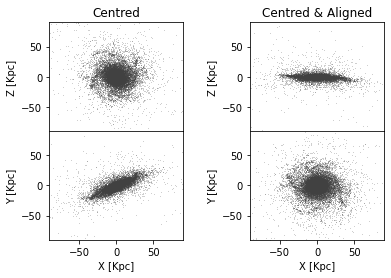

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True,) # sharey=True)
fig.subplots_adjust(wspace=0.5, hspace=0)

#left
ax1 = galc.plot.scatter("x","z", alpha=.5, s=0.5, ptypes=['stars'], color='black', ax=ax1)
ax3 = galc.plot.scatter("x","y", alpha=.5, s=0.5, ptypes=['stars'], color='black', ax=ax3)
#right
ax2 = gal.plot.scatter("x","z", alpha=.5, s=0.5, ptypes=['stars'], color='black',  ax=ax2)
ax4 = gal.plot.scatter("x","y", alpha=.5, s=0.5, ptypes=['stars'], color='black',  ax=ax4)
#legend=False,
ax4.set_xlabel('X [Kpc]')
ax3.set_xlabel('X [Kpc]')
ax3.set_ylabel('Y [Kpc]')
ax4.set_ylabel('Y [Kpc]')
ax1.set_ylabel('Z [Kpc]')
ax2.set_ylabel('Z [Kpc]')

limx=90.
ax1.set_xlim(-limx,limx)
ax2.set_xlim(-limx,limx)
ax3.set_xlim(-limx,limx)
ax4.set_xlim(-limx,limx)
ax1.set_ylim(-limx,limx)
ax2.set_ylim(-limx,limx)
ax3.set_ylim(-limx,limx)
ax4.set_ylim(-limx,limx)


ax1.set_title('Centred')
ax2.set_title('Centred & Aligned')

#plt.savefig('gchop_plots/pos_plane_stars.png', dpi=100)

# Descomposicion Galaxia

## Espacio de parametros

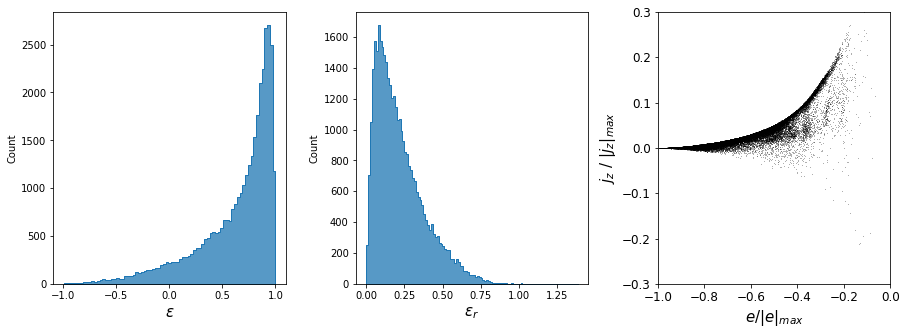

In [12]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
fig.subplots_adjust(hspace=0.4,wspace=0.3)

ax1 = gal.plot.circ_hist("eps", ax=ax1, element='step')
ax2 = gal.plot.circ_hist("eps_r", ax=ax2, element='step')
ax3 = gal.plot.circ_scatter("normalized_star_energy", "normalized_star_Jz", 
                      marker='.', linewidth=0, s=4, color=['black'], alpha=0.4, ax=ax3)

ax1.set_xlabel(r'$\epsilon$', fontsize=15)
ax2.set_xlabel(r'$\epsilon_r$', fontsize=15)
ax3.set_xlim(-1,0)
ax3.set_ylim(-0.3,0.3)
ax3.set_xlabel(r'$e / |e|_{max}$', fontsize=15)
ax3.set_ylabel(r'$j_z\ / \ |j_z|_{max}$', fontsize=15)
ax3.tick_params(axis='both', which='major', labelsize=12)

# JHistogram Model (Abadi +03)

In [13]:
decomposer = gchop.models.JHistogram()
components = decomposer.decompose(gal)

components.describe()

Particles           Deterministic mass          
              Size  Fraction               Size  Fraction
Spheroid      5856  0.157069       5.573670e+09  0.149373
Disk         31427  0.842931       3.174014e+10  0.850627

In [14]:
lab_ab = components.labels[components.ptypes == 'stars']

Text(0, 0.5, 'Y [Kpc]')

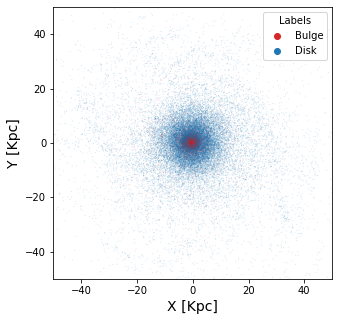

In [15]:
fig, ax = plt.subplots(1,1, figsize=[5, 5])
ax = gal.plot.scatter("x", "y", marker='.', linewidth=0, s=4, alpha=0.2, 
                 ptypes=['stars'], labels = lab_ab, lmap={0: 'Bulge', 1: 'Disk'}, palette=['C3','C0'], ax=ax)
                 #hue_order=['1','0']


cc=50
ax.set_xlim(-cc,cc)
ax.set_ylim(-cc,cc)

ax.set_xlabel('X [Kpc]', fontsize=14)
ax.set_ylabel('Y [Kpc]', fontsize=14)

Text(0.5, 0, '$\\epsilon$')

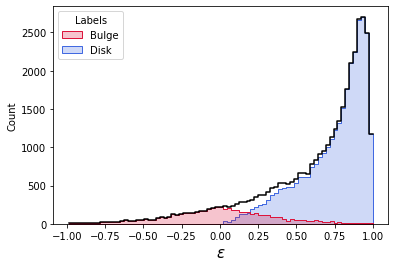

In [16]:
gal.plot.circ_hist("eps", color='black', fill=False , element='step')
gal.plot.circ_hist("eps",labels=lab_ab, lmap={0: 'Bulge', 1: 'Disk'}, palette=['crimson','royalblue'], element='step')
plt.xlabel(r'$\epsilon$', fontsize=15)

# Gaussian Mixture Model

In [17]:
decomposer = gchop.models.GaussianMixture(n_components=2)
components = decomposer.decompose(gal)

components.describe()

Particles          Deterministic mass           Probabilistic mass          
       Size Fraction               Size  Fraction               Size  Fraction
0     16774  0.44991       1.614934e+10  0.432798       1.702314e+10  0.456216
1     20509  0.55009       2.116447e+10  0.567202       2.029067e+10  0.543784

In [18]:
lab_gmm=components.labels[components.ptypes == 'stars']

Text(0.5, 0, '$\\epsilon$')

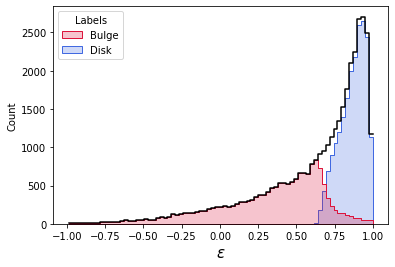

In [19]:
gal.plot.circ_hist("eps", color='black', fill=False , element='step')
gal.plot.circ_hist("eps",labels=lab_gmm, lmap={0: 'Bulge', 1: 'Disk'}, palette=['crimson','royalblue'], element='step')
plt.xlabel(r'$\epsilon$', fontsize=15)